In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

data = pd.read_csv(r"C:\Users\sinha\Downloads\diabetes2.csv")
data.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
print("Total number of patients: "+str(len(data.index)))

Total number of patients: 768


# DATA ANALYSIS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

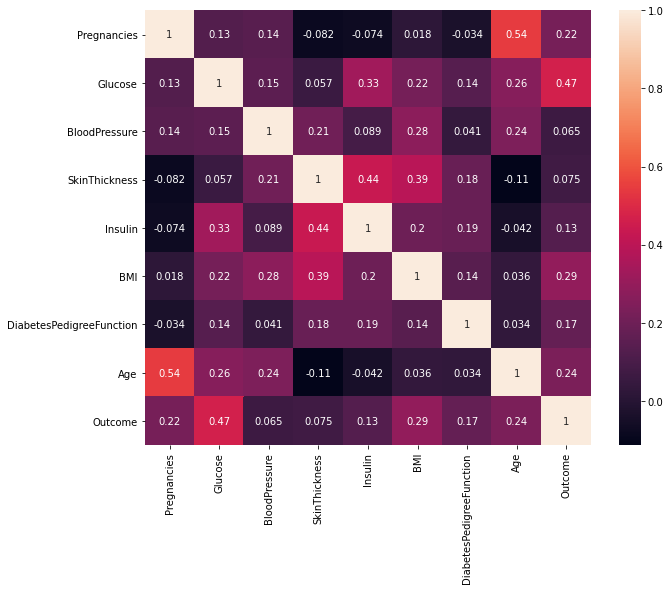

In [7]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

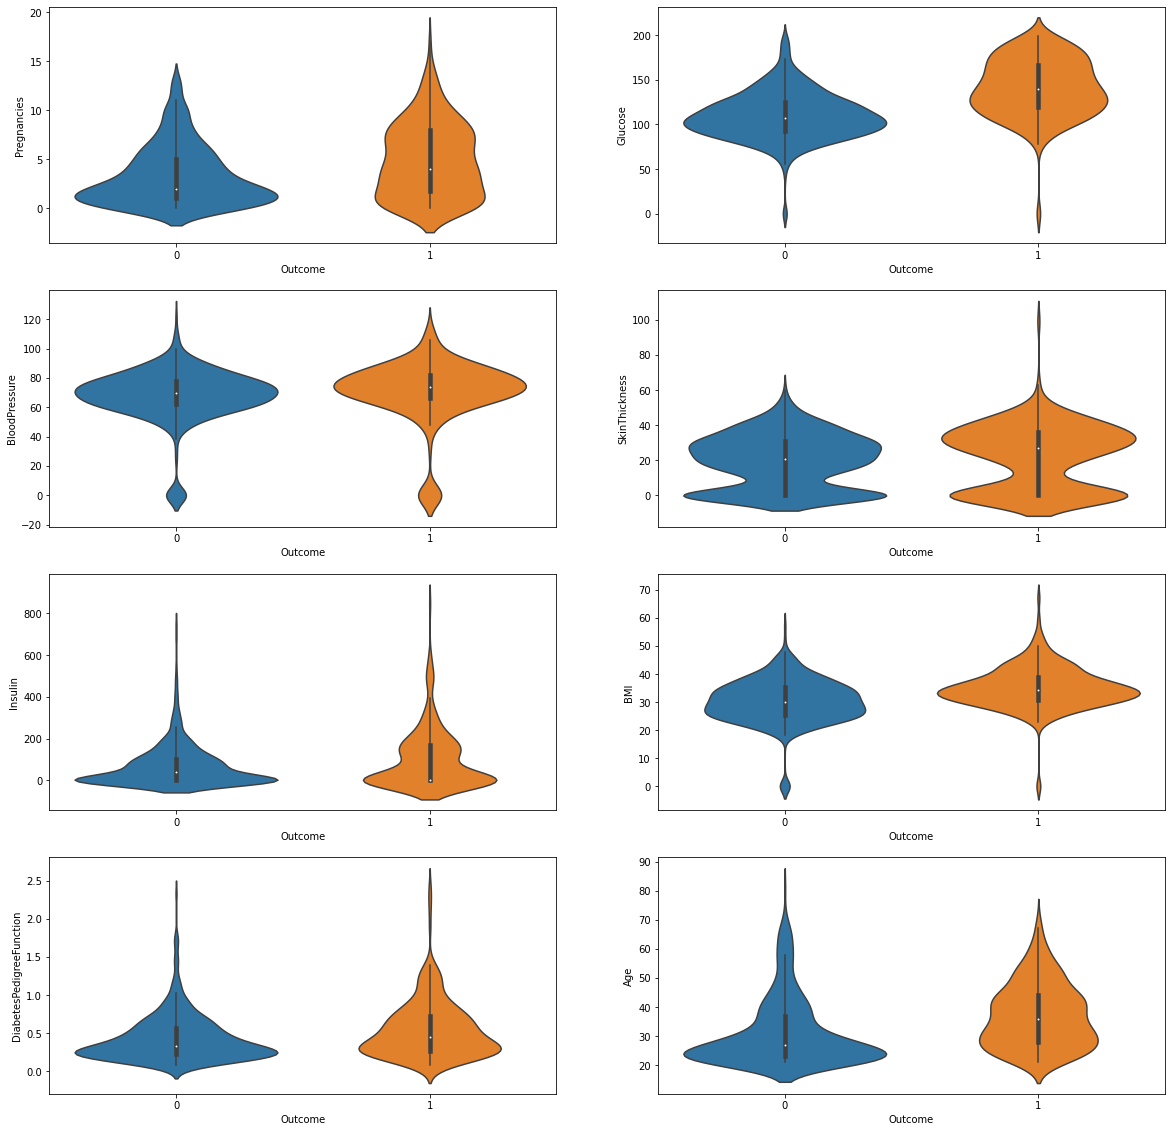

In [8]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.violinplot(x=data.Outcome ,y=data.Pregnancies, ax=axes[0,0])
sns.violinplot(x=data.Outcome ,y=data.Glucose, ax=axes[0,1])
sns.violinplot(x=data.Outcome ,y=data.BloodPressure, ax=axes[1,0])
sns.violinplot(x=data.Outcome ,y=data.SkinThickness, ax=axes[1,1])
sns.violinplot(x=data.Outcome ,y=data.Insulin, ax=axes[2,0])
sns.violinplot(x=data.Outcome ,y=data.BMI, ax=axes[2,1])
sns.violinplot(x=data.Outcome ,y=data.DiabetesPedigreeFunction, ax=axes[3,0])
sns.violinplot(x=data.Outcome ,y=data.Age, ax=axes[3,1])

In [10]:
data.SkinThickness.replace(0, data.SkinThickness.median(), inplace=True)
data.Insulin.replace(0, data.Insulin.median(), inplace=True)
data.Glucose.replace(0, data.Glucose.median(), inplace=True)
data.BloodPressure.replace(0, data.BloodPressure.median(), inplace=True)
data.BMI.replace(0, data.BMI.median(), inplace=True)

c:\users\sinha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

<AxesSubplot:xlabel='Age', ylabel='Density'>

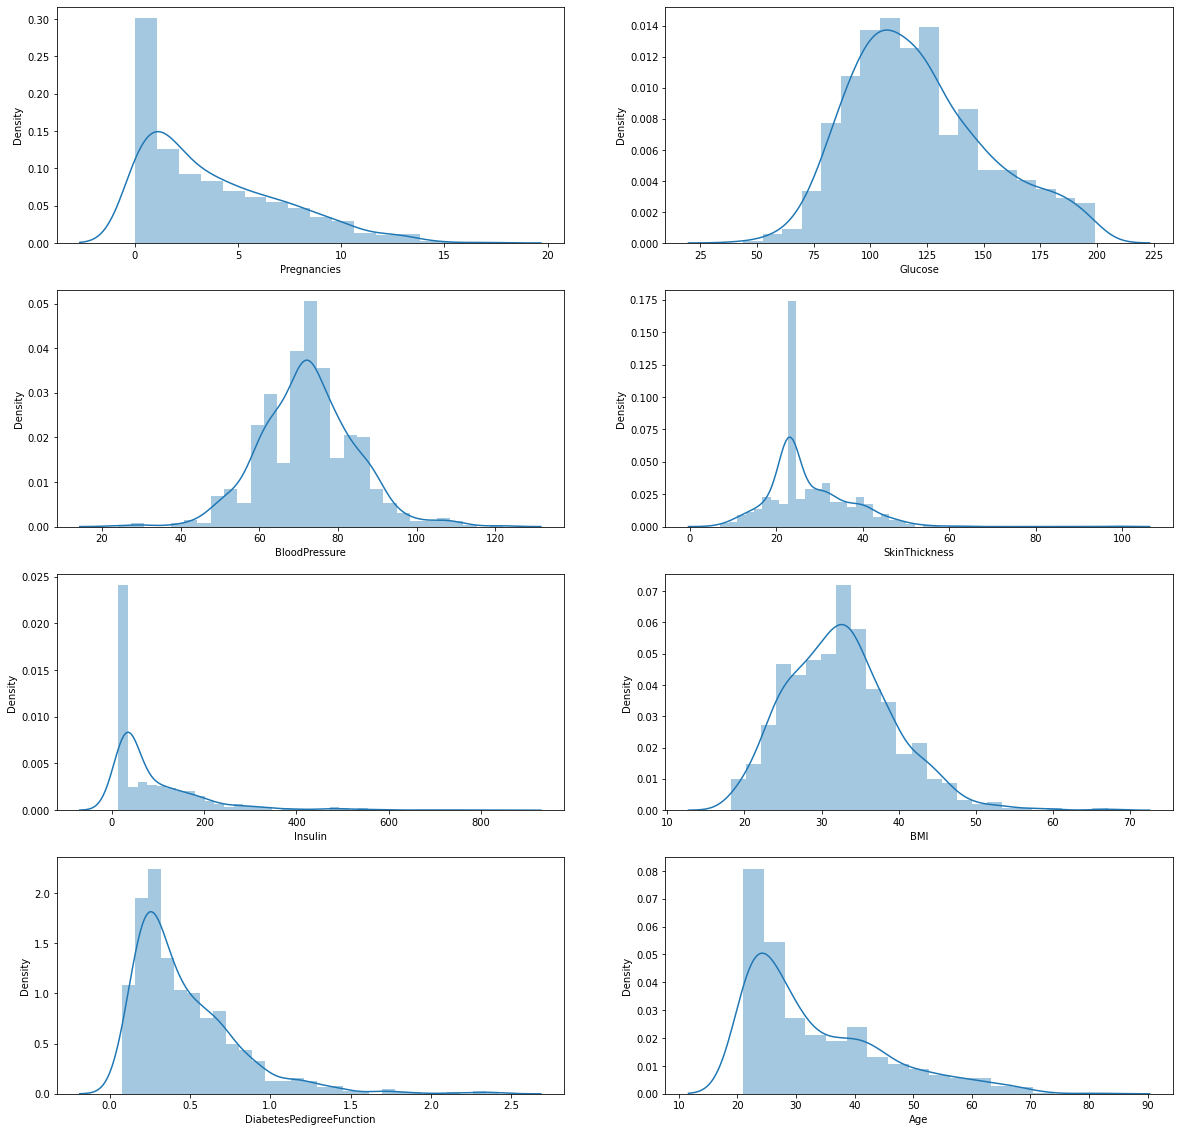

In [13]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(data.Pregnancies, ax=axes[0,0])
sns.distplot(data.Glucose, ax=axes[0,1])
sns.distplot(data.BloodPressure, ax=axes[1,0])
sns.distplot(data.SkinThickness, ax=axes[1,1])
sns.distplot(data.Insulin, ax=axes[2,0])
sns.distplot(data.BMI, ax=axes[2,1])
sns.distplot(data.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(data.Age, ax=axes[3,1])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

X = data.drop('Outcome', axis =1).values
y = data.Outcome.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

In [45]:
def neural_network():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(15, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    #layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(10, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    #layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(8, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [46]:
model = neural_network()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 8)]               0         
_________________________________________________________________
FC1 (Dense)                  (None, 15)                135       
_________________________________________________________________
BC1 (BatchNormalization)     (None, 15)                60        
_________________________________________________________________
Activation1 (Activation)     (None, 15)                0         
_________________________________________________________________
FC2 (Dense)                  (None, 10)                160       
_________________________________________________________________
BC2 (BatchNormalization)     (None, 10)                40        
_________________________________________________________________
Activation2 (Activation)     (None, 10)                0   

In [47]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [49]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

In [50]:
model.fit(x=X_train, y=y_train, epochs=1000, callbacks=[reduce_lr, early_stopping], validation_data=(X_dev, y_dev), verbose=1)

Epoch 1/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.4653 - accuracy: 0.7803 - val_loss: 0.6442 - val_accuracy: 0.7217
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.4255 - accuracy: 0.8063 - val_loss: 0.6289 - val_accuracy: 0.7217
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.7691 - val_loss: 0.6356 - val_accuracy: 0.7304
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.7765 - val_loss: 0.6273 - val_accuracy: 0.7130
Epoch 5/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.7896 - val_loss: 0.6332 - val_accuracy: 0.7391
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.4662 - accuracy: 0.7914 - val_loss: 0.6332 - val_accuracy: 0.7304
Epoch 7/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.8045 - val_loss: 0.6679 - val_accuracy: 0.6870
Epoch 